In [24]:
import pandas as pd
import seaborn as sns
from sklearn import model_selection

In [9]:
data = pd.read_csv('red_wine_quality.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0, 0.5, 'Frequency')

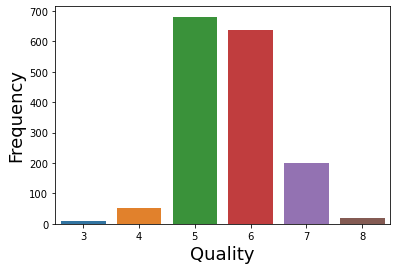

In [12]:
# Looking at the distribution of labels i.e., our quality column
b = sns.countplot(x='quality',data=data)
b.set_xlabel('Quality',fontsize=18)
b.set_ylabel('Frequency',fontsize=18)

We can see the label is very much skewed. So, we cannot apply straightforward k-fold cross validation. We need to preserve the ratio of all the labels, thus we do stratified k-fold cross-validation.

In [13]:
# Making a new column in the dataset with name kfold and filling it with value -1
data['kfold'] = -1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-1


In [15]:
# Randomizing the rows in the dataset and also resetting the index
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.4,0.24,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6,-1
1,8.2,0.31,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,7,-1
2,10.1,0.43,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,-1
3,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,5,-1
4,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,-1


In [16]:
# Fetching the target column
y = data.quality.values

In [17]:
# Initializing the stratified k-fold from the model_selection package in sklearn library
kf = model_selection.StratifiedKFold(n_splits=5) # splitting the dataset into 5 equal parts

In [18]:
# Filling the new kfold column
for fold, (train_,val_) in enumerate(kf.split(X=data, y=y)):
    data.loc[val_,'kfold']=fold
    
# Saving the new csv with kfold column
data.to_csv('Red_Wine_Quality_Stratified_Kfold.csv',index=False)

In [21]:
# Reading and displaying the stratified datset
stratified_data = pd.read_csv('Red_Wine_Quality_Stratified_Kfold.csv')
stratified_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.4,0.24,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6,0
1,8.2,0.31,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,7,0
2,10.1,0.43,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,0
3,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,5,0
4,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,0


Text(0, 0.5, 'Frequency')

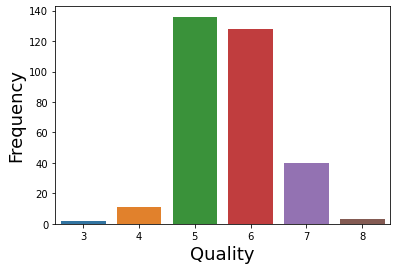

In [23]:
# Looking at the distribution of labels i.e., our quality column in one of classes (class 0)
zero_class = stratified_data.loc[stratified_data['kfold'] == 0]
b = sns.countplot(x='quality',data=zero_class)
b.set_xlabel('Quality',fontsize=18)
b.set_ylabel('Frequency',fontsize=18)

Thus, we can see ratio of labels in the stratified dataset remains same as the original distribution